<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/Cifar_100%2C_fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

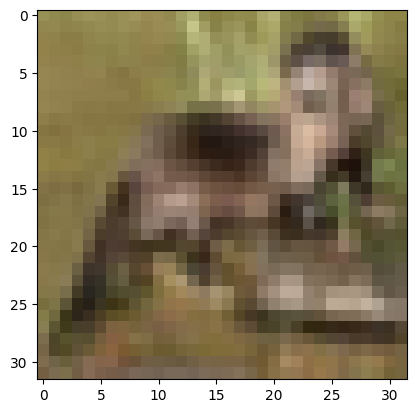

In [51]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import math 
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x = x_train
y = y_test
digit = x_train[100]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# print('so nay la', y_train[1000])

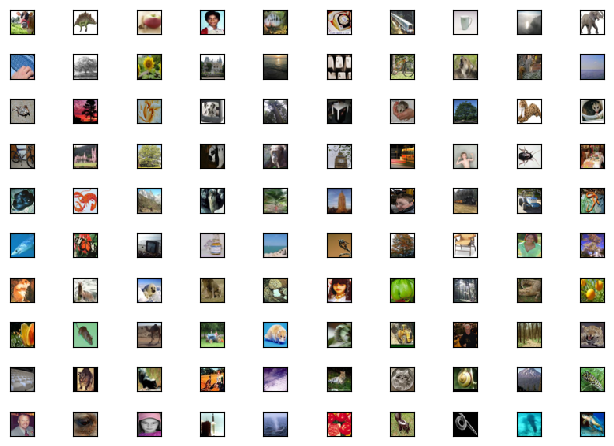

In [52]:
for i in range(100):
  plt.subplot(10,10, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  # plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [53]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(1024*3,)))

model.add(Dense(100, activation='Softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dense_17 (Dense)            (None, 100)               12900     
                                                                 
Total params: 406,244
Trainable params: 406,244
Non-trainable params: 0
_________________________________________________________________


In [54]:
x_train = x_train.reshape(50000, 1024*3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 1024*3)
x_test = x_test.astype('float32')/255

x_train.shape

x_test.shape

(10000, 3072)

In [55]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

y_test.shape

(10000, 100)

In [56]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat:', test_loss)
print('Do chinh xac:', test_acc)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 4.3575 - accuracy: 0.0448 - val_loss: 4.1570 - val_accuracy: 0.0604
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 3.9887 - accuracy: 0.0911 - val_loss: 3.9248 - val_accuracy: 0.1032
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 3.8453 - accuracy: 0.1149 - val_loss: 3.8018 - val_accuracy: 0.1256
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 3.7639 - accuracy: 0.1292 - val_loss: 3.7936 - val_accuracy: 0.1290
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 3.7097 - accuracy: 0.1401 - val_loss: 3.7650 - val_accuracy: 0.1348
Epoch 6/10
391/391 [==============================] - 5s 12ms/step - loss: 3.6644 - accuracy: 0.1474 - val_loss: 3.7146 - val_accuracy: 0.1464
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 3.6201 - accuracy: 0.1554 - val_loss: 3.6727 - val_accuracy: 0.1490

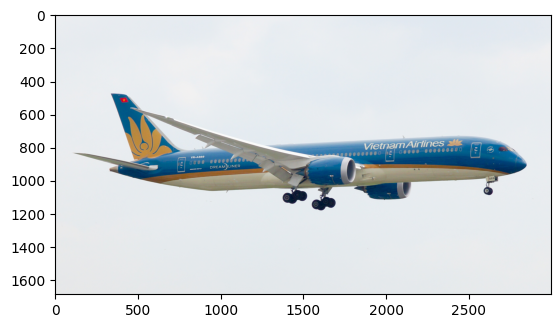

In [57]:
# model.save('test1.h5')
import pandas as pd
url = 'maybay.jpg'
img = plt.imread(url)
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 44ms/step


array([39])

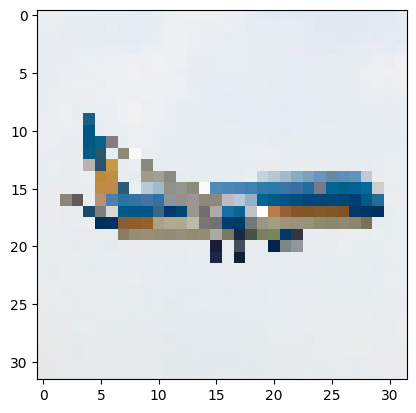

In [58]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)
